In [1]:
import site

site.addsitedir("../src")

import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm

import cpp_game
from ai.rollout import do_batch_rollout_cpp
from game.settings import Settings
from game.tasks import TASK_DEFS

In [2]:
%matplotlib inline

In [3]:
# task_idx = 2
# settings = Settings(
#     use_signals=False, bank="all", task_distro="random", task_idxs=(task_idx,)
# )
# cpp_settings = settings.to_cpp()
# num_rollouts = 100
# batch_rollout = cpp_game.BatchRollout(cpp_settings, num_rollouts)
# formula, _, difficulty = TASK_DEFS[task_idx]
#
# print(formula)
#
# # td = do_batch_rollout_cpp(batch_rollout, batch_seed=42, device="cpu")
# # mean_reward = td["rewards"].sum(dim=1).mean().item()
# # pos_reward = (td["rewards"].sum(dim=1) > -0.95).float().mean().item()
# # win_rate = td["win"].float().mean().item()
#
# rollouts = do_batch_rollout(settings, num_rollouts=num_rollouts, batch_seed=42)
# win_rate = np.mean([x["win"] for x in rollouts])
# pos_reward = np.mean([np.sum(x["rewards"]) > -0.95 for x in rollouts])
#
# print(win_rate)
# print(pos_reward)

In [4]:
num_tasks = len(TASK_DEFS)

rows = []
for task_idx in tqdm(range(num_tasks)):
    settings = Settings(
        use_signals=False, bank="all", task_distro="random", task_idxs=(task_idx,)
    )
    cpp_settings = settings.to_cpp()
    num_rollouts = 200
    batch_rollout = cpp_game.BatchRollout(cpp_settings, num_rollouts)

    td = do_batch_rollout_cpp(batch_rollout, batch_seed=42, device="cpu")
    mean_reward = td["rewards"].sum(dim=1).mean().item()
    pos_reward = (td["rewards"].sum(dim=1) > -0.95).float().mean().item()
    win_rate = td["win"].float().mean().item()
    formula, _, difficulty = TASK_DEFS[task_idx]
    rows.append(
        dict(
            task_idx=task_idx,
            formula=formula,
            difficulty=difficulty,
            mean_reward=mean_reward,
            pos_reward=pos_reward,
            win_rate=win_rate,
        )
    )

df = pd.DataFrame(rows)

100%|██████████| 91/91 [00:10<00:00,  8.80it/s]


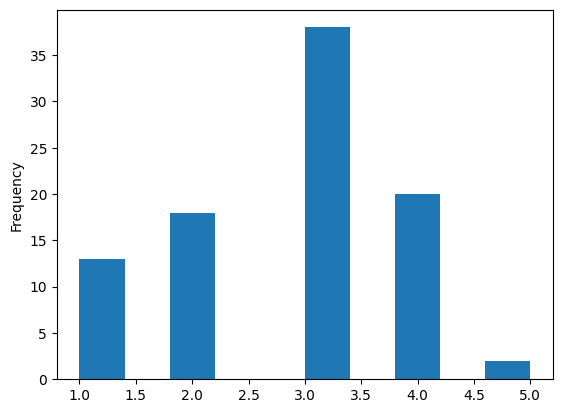

In [5]:
df["difficulty"].plot.hist()
plt.show()

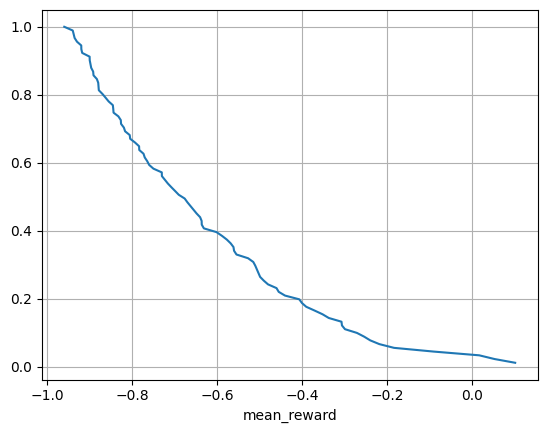

In [6]:
df.groupby("mean_reward").size().pipe(lambda df: df[::-1].cumsum() / df.sum()).plot(
    grid=True
)
plt.show()

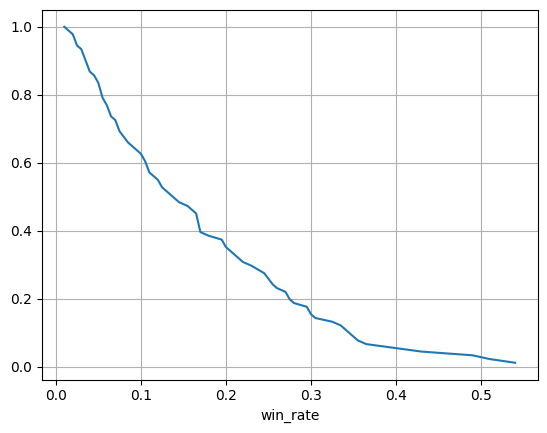

In [7]:
df.groupby("win_rate").size().pipe(lambda df: df[::-1].cumsum() / df.sum()).plot(
    grid=True
)
plt.show()

In [8]:
print((df["win_rate"] > 0.05).mean())
print((df["pos_reward"] > 0.05).mean())

0.8351648351648352
0.945054945054945


In [9]:
df.sort_values("win_rate").head(20)

,task_idx,formula,difficulty,mean_reward,pos_reward,win_rate
89,89,9b 9p 9y 9g,5,-0.935625,0.285,0.010
71,71,#p=1 #g=1,4,-0.896528,0.805,0.015
60,60,T-1 #T=1,4,-0.900278,0.770,0.020
74,74,3b 3g 3y 3p,4,-0.919792,0.290,0.020
26,26,#sweep>=1,4,-0.960000,0.020,0.020
72,72,3g 4y 5y,4,-0.917778,0.440,0.025
62,62,T0 #T=1,3,-0.883194,0.685,0.030
15,15,1T T-1 2g,4,-0.940000,0.030,0.030
13,13,1T #rank(<=5)=0,4,-0.940000,0.030,0.030
42,42,2t #t=1,3,-0.862639,0.970,0.035


In [10]:
df.sort_values("win_rate", ascending=False).head(20)

,task_idx,formula,difficulty,mean_reward,pos_reward,win_rate
28,28,#t=0,1,0.102222,0.795,0.540
57,57,consec(2),1,0.053750,0.915,0.510
68,68,no(consec(2)),2,0.017500,0.790,0.490
41,41,no(T0) no(T1) no(T2),2,-0.089722,0.965,0.430
46,46,#5=0,2,-0.217778,0.945,0.365
43,43,#p>=1 #g>=1 #y>=1 #b>=1,3,-0.183194,1.000,0.365
77,77,#y=0,2,-0.270556,0.580,0.355
75,75,#y>#b,1,-0.239167,0.775,0.350
65,65,#p>#g,1,-0.253611,0.785,0.345
55,55,#p=0,2,-0.306944,0.595,0.335


In [11]:
med_df = df.query("win_rate >= 0.2 and difficulty <= 3")
task_idxs = med_df["task_idx"].to_list()
med_task_defs = [TASK_DEFS[i] for i in task_idxs]
print(med_task_defs)
print()

print("{" + ", ".join(f'{{"{x}", "{y}", {z}}}' for x, y, z in med_task_defs) + "};")

[('1T #rank(>6)=0 #t=0', 'I will win a trick of which the card values are all less than 7. Submarines are not allowed in the trick.', 3), ('1T sum>=22 sum<=23 #t=0', 'I will win a trick with a total value of 22 or 23. Submarines are not allowed in the trick.', 3), ('6g', 'I will win 6g', 1), ('#7>=2', "I will win at least 2 7's.", 2), ('#T=2', 'I will win exactly 2 tricks.', 2), ('#t=0', 'I will win no submarines.', 1), ('T-1', 'I will win the last trick.', 3), ('3p', 'I will win 3p.', 1), ('consec(3)', 'I will win 3 tricks in a row.', 3), ('no(T0) no(T1) no(T2)', 'I will win none of the first 3 tricks.', 2), ('#p>=1 #g>=1 #y>=1 #b>=1', 'I will win at least one card of each color.', 3), ('#5=0', 'I will no 5', 2), ('3t', 'I will win 3t.', 1), ('T0', 'I will win the first trick.', 1), ('1y', 'I will win 1y.', 1), ('#T>#T(anyother)', 'I will win more tricks than anyone else.', 3), ('#p=0', 'I will win no pink.', 2), ('consec(2)', 'I will win 2 tricks in a row.', 1), ('#9=2', "I will win 

In [12]:
len(med_df), len(df)

(32, 91)